In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [145]:
df = pd.read_csv(r"/Users/ziadali/Documents/Semster 5/Data Science (Ai.342)/Data Science Project/cleaned_data1.csv")

In [52]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,34999


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3560 non-null   object
 1   model         3560 non-null   object
 2   model_year    3560 non-null   int64 
 3   milage        3560 non-null   int64 
 4   fuel_type     3560 non-null   object
 5   engine        3560 non-null   object
 6   transmission  3560 non-null   object
 7   ext_col       3560 non-null   object
 8   int_col       3560 non-null   object
 9   accident      3560 non-null   object
 10  price         3560 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 306.1+ KB


In [54]:
df.describe()

,model_year,milage,price
count,3560.000000,3560.000000,3.560000e+03
mean,2015.465730,66458.472753,4.340187e+04
std,5.819806,52106.149413,7.953055e+04
min,1996.000000,100.000000,2.000000e+03
25%,2012.000000,24650.750000,1.699725e+04
50%,2017.000000,55000.000000,3.000000e+04
75%,2020.000000,96000.000000,4.862450e+04
max,2024.000000,405000.000000,2.954083e+06


In [55]:
df['model'].value_counts()

model
M3 Base                  29
Corvette Base            22
F-150 XLT                20
1500 Laramie             18
Camaro 2SS               17
                         ..
Sprinter Normal Roof      1
530e Base                 1
XJ Vanden Plas            1
Ram 2500 SLT Quad Cab     1
Continental GT Speed      1
Name: count, Length: 1732, dtype: int64

In [56]:
ave_price = df['price'].mean()
print(ave_price)

43401.86713483146


In [57]:
lowest_price = df['price'].min()
highest_price = df['price'].max()
print(lowest_price)
print(highest_price)

2000
2954083


In [58]:
ave_mileage = df['milage'].mean()
print(ave_mileage)

66458.47275280899


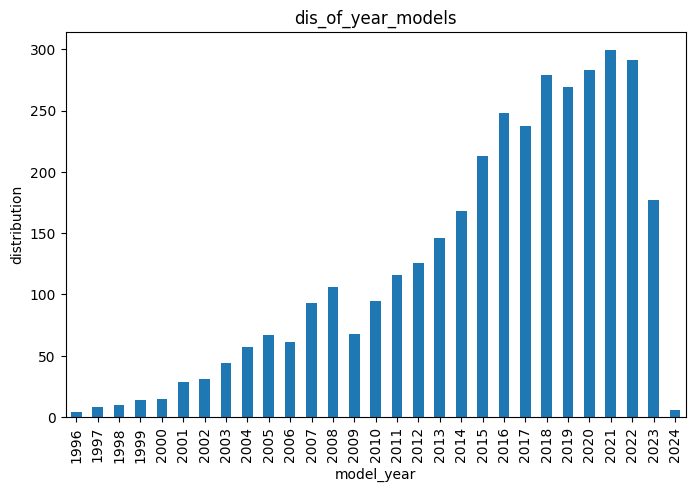

In [59]:
dis_of_year_models = df['model_year'].value_counts().sort_index()
dis_of_year_models.plot(kind='bar' , figsize=(8,5))
plt.xlabel('model_year')
plt.ylabel('distribution')
plt.title('dis_of_year_models')
plt.show()


In [60]:
most_type_of_fuel = df['fuel_type'].value_counts().idxmax()
print(most_type_of_fuel)

Gasoline


In [61]:
most_transmission = df["transmission"].value_counts().idxmax()
print(most_transmission)

A/T


In [62]:
most_colors_ext = df['ext_col'].value_counts().idxmax()
print(most_colors_ext)

Black


In [63]:
most_colors_int = df['int_col'].value_counts().idxmax()
print(most_colors_int)

Black


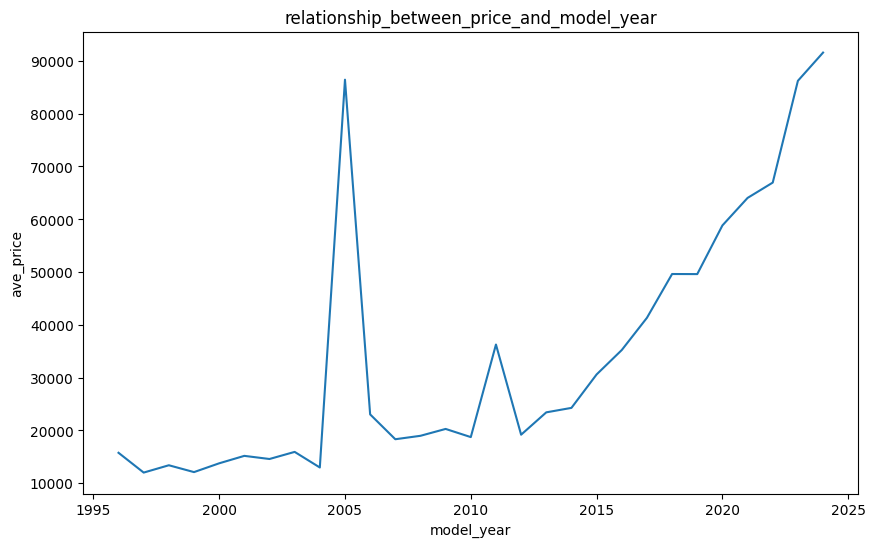

In [77]:
relationship_between_price_and_model_year = df.groupby('model_year')['price'].mean().sort_index()
relationship_between_price_and_model_year.plot(kind='line' ,figsize=(10,6))
plt.xlabel('model_year')
plt.ylabel('ave_price')
plt.title('relationship_between_price_and_model_year')
plt.show()

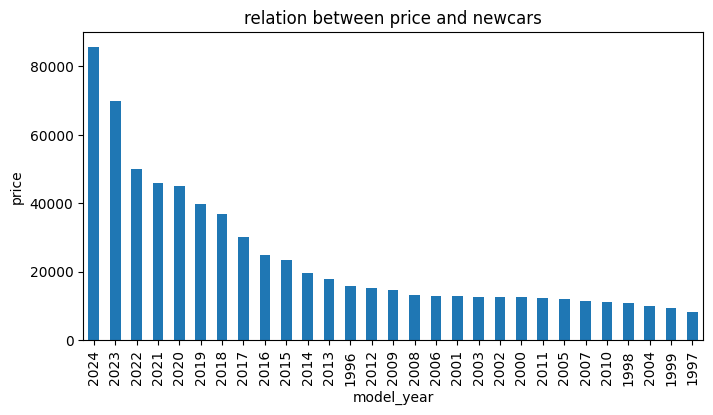

In [76]:
price_and_newercars = df.groupby('model_year')['price'].median().sort_values(ascending=False)
price_and_newercars.plot(kind = 'bar' , figsize=(8,4))
plt.xlabel('model_year')
plt.ylabel('price')
plt.title('relation between price and newcars')
plt.show()

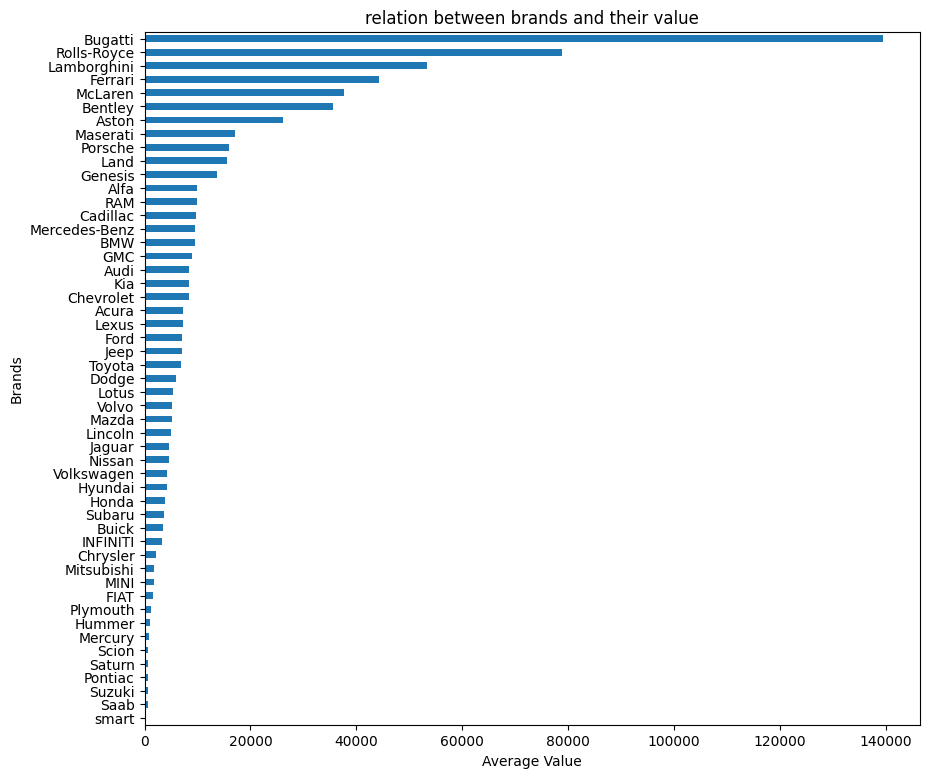

In [78]:
df['milage_in_kelos'] = df['milage'] / 1000 
df['car_age'] = df['model_year'].max() - df['model_year']
df['value_index'] = df['price'] / (df['car_age'] + 1)
value_loss = df.groupby('brand')['value_index'].mean().sort_values()

value_loss.plot(kind='barh', figsize=(10, 9))
plt.xlabel("Average Value")
plt.ylabel("Brands")
plt.title("relation between brands and their value")
plt.show()


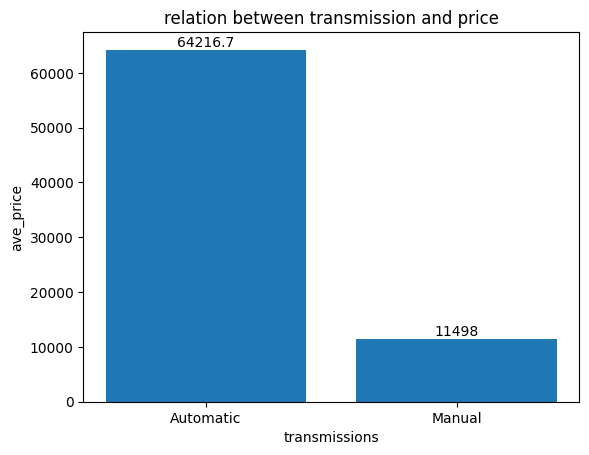

In [96]:
auto_cars = df[df['transmission'] == 'Automatic']['price'].mean()
manual_cars = df[df['transmission'] == 'Manual']['price'].mean()

plt.bar(['Automatic', 'Manual'], [auto_cars, manual_cars], color='blue')
bars = plt.bar(['Automatic', 'Manual'],[auto_cars, manual_cars])
plt.bar_label(bars)
plt.xlabel('transmissions')
plt.ylabel('ave_price')
plt.title('relation between transmission and price')
plt.show()

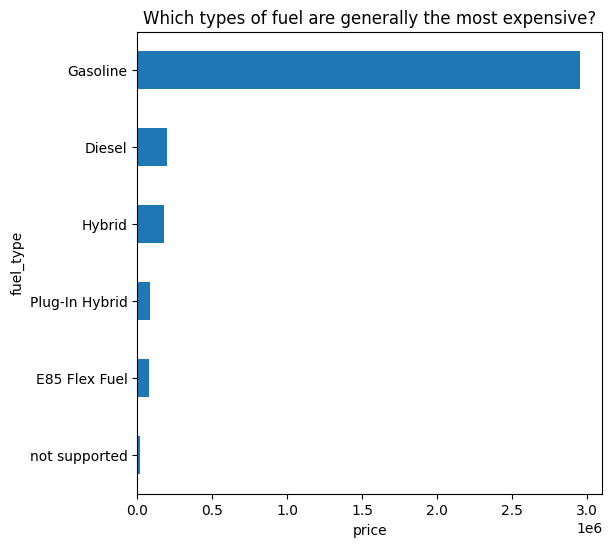

In [102]:
most_fuel_exp = df.groupby('fuel_type')['price'].max().sort_values()

most_fuel_exp.plot(kind='barh' , figsize=(6,6))
plt.ylabel('fuel_type')
plt.xlabel('price')
plt.title('Which types of fuel are generally the most expensive?')
plt.show()

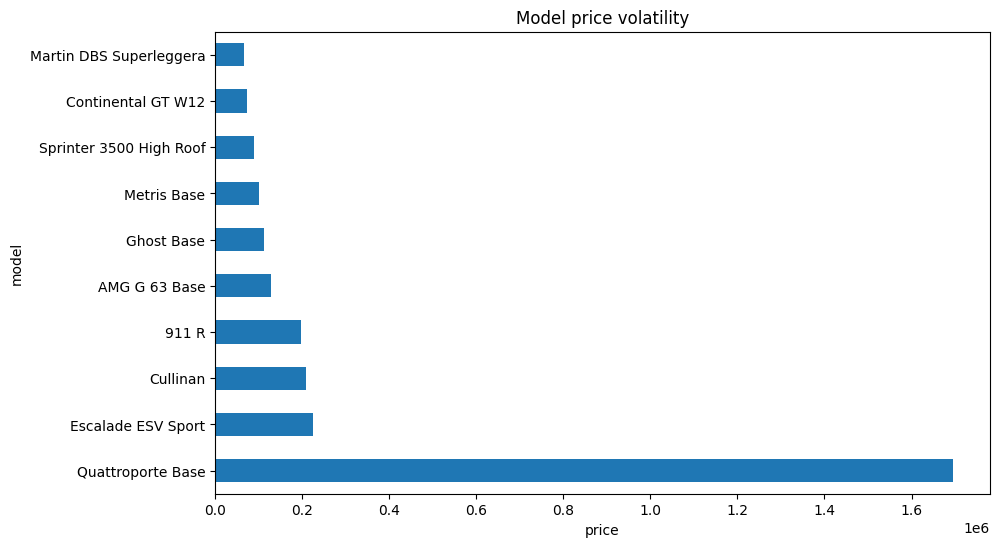

In [115]:
volatility = df.groupby("model")['price'].std().sort_values(ascending=False)

volatility.head(10).plot(kind='barh',figsize=(10 , 6))
plt.ylabel('model')
plt.xlabel('price')
plt.title("Model price volatility")
plt.show()

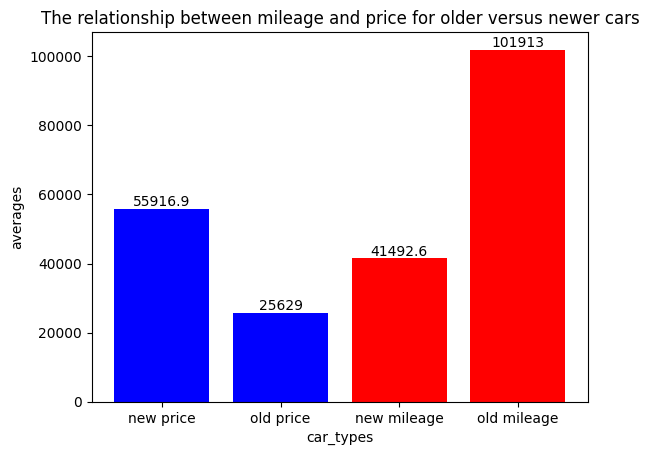

In [147]:
df['car_type'] = df['model_year'].apply(
    lambda x : 'old' if x <= 2015 else 'new'
)
ave_price = df.groupby('car_type')['price'].mean()
ave_milage = df.groupby('car_type')['milage'].mean()


labels = ['new price', 'old price', 'new mileage', 'old mileage']
values = [ave_price['new'], ave_price['old'], ave_milage['new'], ave_milage['old']]
bars = plt.bar(labels, values, color=['blue', 'blue', 'red', 'red'])
plt.bar_label(bars)  
plt.xlabel("car_types")
plt.ylabel('averages')
plt.title('The relationship between mileage and price for older versus newer cars')
plt.show()


In [ ]:
"""
1- The most common model.
2- Average price of cars.
3- Lowest and highest price.
4- Average mileage for all cars.
5- Distribution of year models (model_year).
6- The most common type of fuel.
7- The most common type of transmission.
8- Most common exterior colors.
9- Most popular interior colors
10- The relationship between price and model year
11- Are newer cars consistently more expensive?
12- Which brands lose their value the fastest?
13- Are cars with automatic transmission more expensive than those with manual transmission?
14- Which types of fuel are generally the most expensive?
15- Model price volatility
16- The relationship between mileage and price for older versus newer cars
"""